In [15]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
repo_path = "/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset"
print("Content:",os.listdir(repo_path))


Content: ['.git', 'amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


In [19]:
import glob
image_paths = []
labels = []
for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
       for img_file in os.listdir(class_folder):
           image_paths.append(os.path.join(class_folder,img_file))
           labels.append(class_name)

print(f"Total images: {len(image_paths)}")


Total images: 1586


In [20]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1269 images belonging to 31 classes.
Found 315 images belonging to 31 classes.


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # 31 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,308,639 (12.62 MB)

 Trainable params: 3,308,639 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [23]:
from PIL import Image, UnidentifiedImageError
import os

# Set dataset path
dataset_path = '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset'

# Walk through all directories
bad_files = []
for root, dirs, files in os.walk(dataset_path):
    # Skip .git or hidden/system folders
    if '.git' in root or '/.' in root:
        continue
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(root, file)
            try:
                # Try to open the image
                with Image.open(file_path) as img:
                    img.verify()  # verify it's not broken
            except (UnidentifiedImageError, OSError):
                bad_files.append(file_path)

# Delete bad images
for bad in bad_files:
    try:
        os.remove(bad)
        print(f"Deleted: {bad}")
    except Exception as e:
        print(f"Could not delete: {bad} — {e}")


In [24]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1269 images belonging to 31 classes.
Found 315 images belonging to 31 classes.


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Important: Enables train/val split
)


In [27]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1269 images belonging to 31 classes.
Found 315 images belonging to 31 classes.


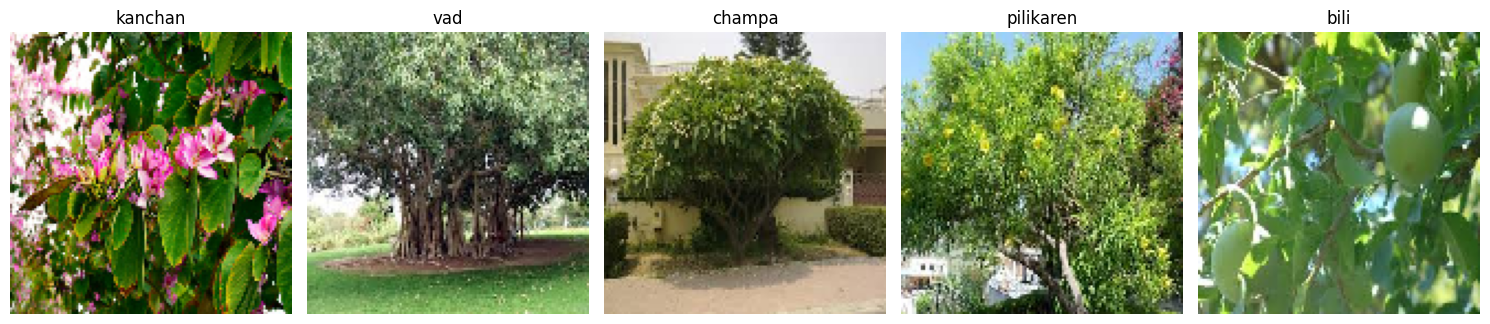

In [29]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import random

# Set the dataset path
dataset_path = '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset'

# Get all valid class folders (ignore hidden/system folders like .git)
class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')]

# Display 1 image from 5 random classes
plt.figure(figsize=(15, 5))
for i, class_name in enumerate(random.sample(class_names, 5)):
    class_folder = os.path.join(dataset_path, class_name)
    img_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not img_files:
        continue  # skip if no image files

    img_path = os.path.join(class_folder, img_files[0])
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img).astype("uint8")

    plt.subplot(1, 5, i + 1)
    plt.imshow(img_array.astype("uint8"))
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()


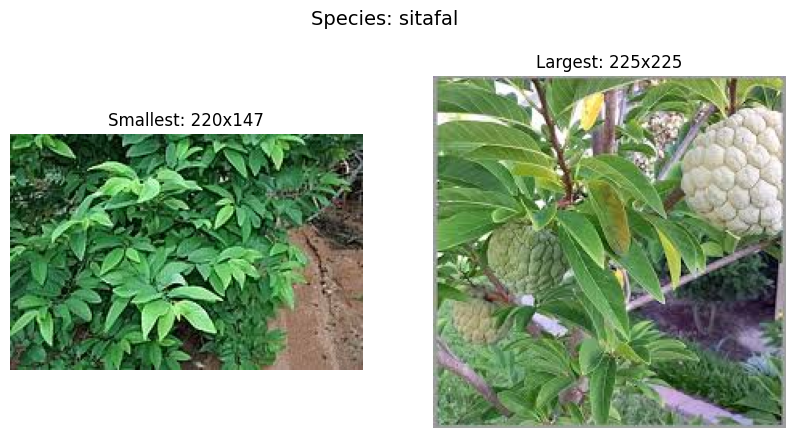

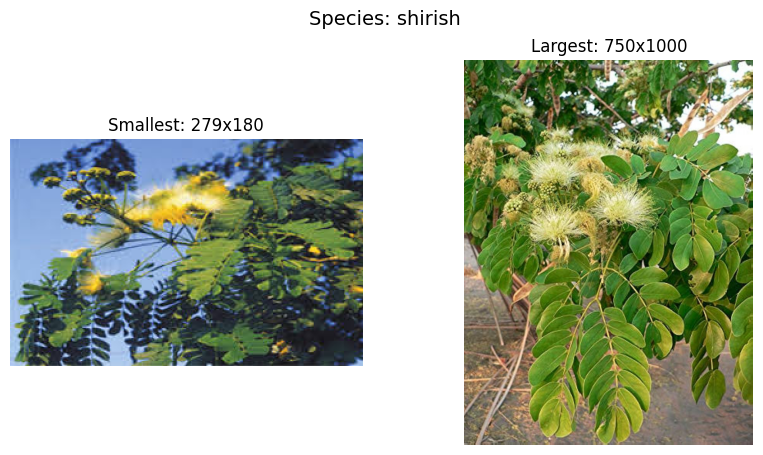

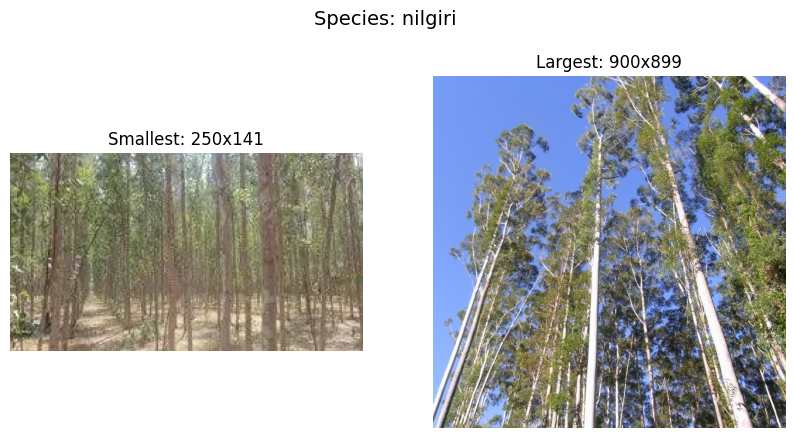

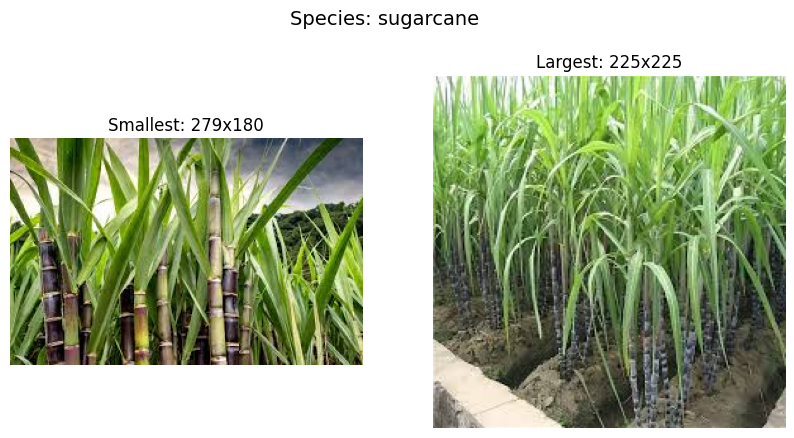

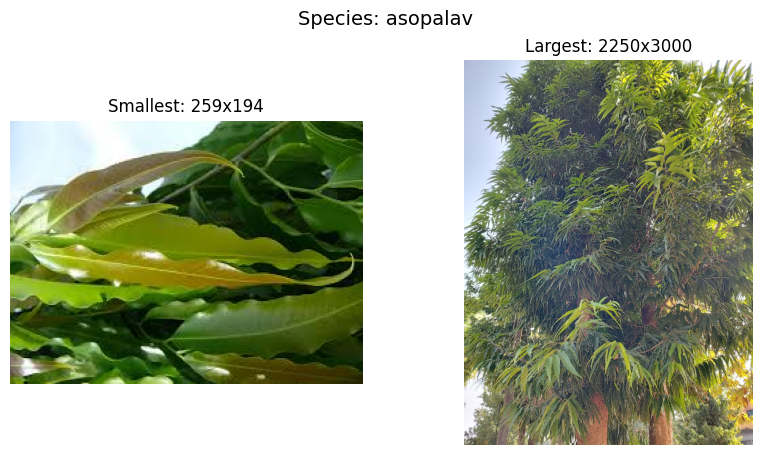

In [30]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Dataset path
dataset_path = '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset'

# Get only valid image folders (ignore .git and hidden/system folders)
class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')]

# Pick 5 random species
selected_species = random.sample(class_names, 5)

for species in selected_species:
    species_path = os.path.join(dataset_path, species)
    image_files = [f for f in os.listdir(species_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    image_paths = []
    dimensions = []

    for f in image_files:
        path = os.path.join(species_path, f)
        try:
            with Image.open(path) as img:
                dimensions.append(img.size)  # (width, height)
                image_paths.append(path)
        except:
            continue

    if dimensions:
        # Get smallest and largest by area
        areas = [w * h for (w, h) in dimensions]
        smallest_idx = areas.index(min(areas))
        largest_idx = areas.index(max(areas))

        # Display both
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle(f"Species: {species}", fontsize=14)

        # Smallest
        smallest_img = Image.open(image_paths[smallest_idx])
        axs[0].imshow(smallest_img)
        axs[0].set_title(f"Smallest: {dimensions[smallest_idx][0]}x{dimensions[smallest_idx][1]}")
        axs[0].axis('off')

        # Largest
        largest_img = Image.open(image_paths[largest_idx])
        axs[1].imshow(largest_img)
        axs[1].set_title(f"Largest: {dimensions[largest_idx][0]}x{dimensions[largest_idx][1]}")
        axs[1].axis('off')

        plt.show()
    else:
        print(f"\nSpecies: {species}")
        print("No valid images found.")


In [31]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 672ms/step - accuracy: 0.0965 - loss: 3.3825 - val_accuracy: 0.1492 - val_loss: 3.1048
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.1408 - loss: 3.0152 - val_accuracy: 0.1429 - val_loss: 3.1027
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.2501 - loss: 2.7502 - val_accuracy: 0.2667 - val_loss: 2.6363
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.3496 - loss: 2.3181 - val_accuracy: 0.3238 - val_loss: 2.4885
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - accuracy: 0.4388 - loss: 2.0007 - val_accuracy: 0.2921 - val_loss: 2.7008
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.5397 - loss: 1.6547 - val_accuracy: 0.3333 - val_loss: 2.7076
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.6443 - loss: 1.2628 - val_accuracy: 0.3587 - val_loss: 2.6382
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - accuracy: 0.7764 - loss: 0.8198 - val_accuracy: 

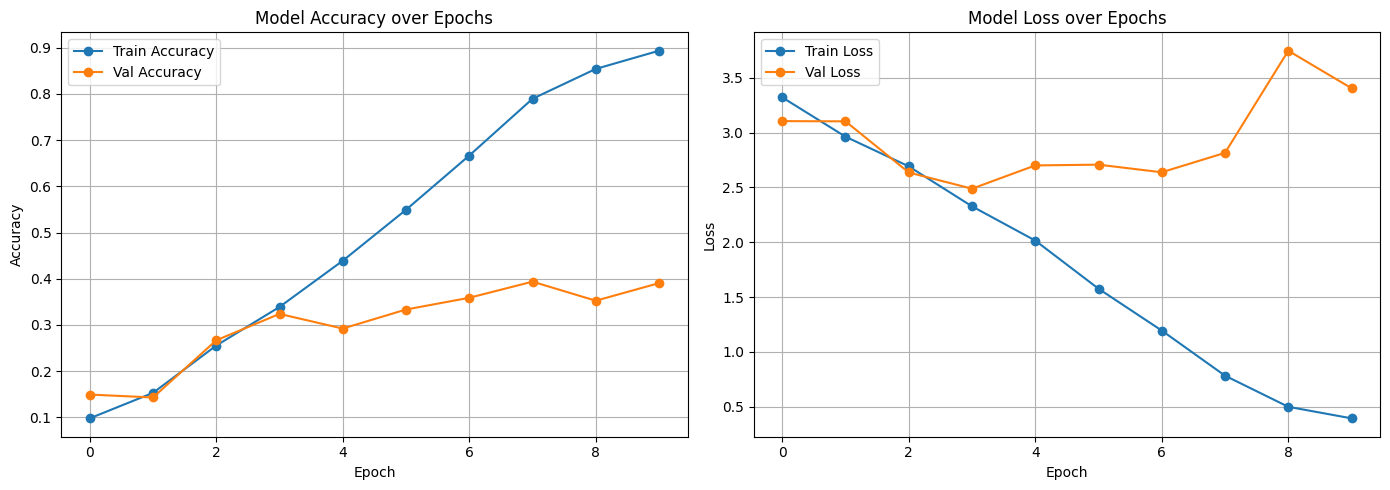

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Found 1269 images belonging to 31 classes.
Found 315 images belonging to 31 classes.
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 440ms/step - accuracy: 0.0496 - loss: 4.6882 - val_accuracy: 0.0381 - val_loss: 4.4695
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 312ms/step - accuracy: 0.0851 - loss: 3.3418 - val_accuracy: 0.0317 - val_loss: 6.4696
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 311ms/step - accuracy: 0.1064 - loss: 3.2765 - val_accuracy: 0.0540 - val_loss: 8.1058
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 312ms/step - accuracy: 0.1034 - loss: 3.2410 - val_accuracy: 0.0317 - val_loss: 8.7003
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 310ms/step - accuracy: 0.0956 - loss: 3.2320 - val_accuracy: 0.0317 - val_loss: 9.4394
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 313ms/step - accuracy: 0.1177 - loss: 3.2159 - val_accuracy: 0.0349 - val_loss: 9.1012
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 307ms/step - accuracy: 0.1106 - loss: 3.2494 - val_accuracy: 0.0349 - val_loss: 8.7510
Epoch 8/10
4

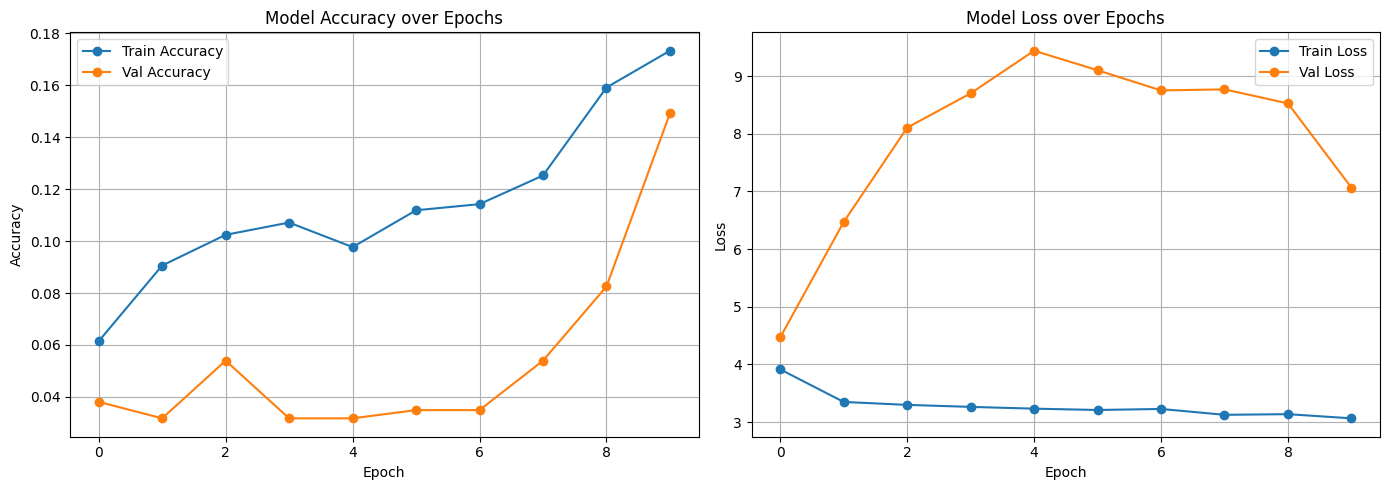

In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Dataset path
dataset_path = '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset'

# Image size and training parameters
img_size = (128, 128)
batch_size = 32
epochs = 10

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Data Generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Build CNN Model with Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(train_generator.num_classes, activation='softmax')
])

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train Model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Plot Accuracy and Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
